In [148]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Polynomial Regression library
from sklearn.preprocessing import PolynomialFeatures

# Linear Regression Library
from sklearn.linear_model import LinearRegression

# Cross-Validation related Libraries
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Import Lasso for Dimension Reduction
from sklearn.linear_model import Lasso

# For splitting the dataset into test and Train
from sklearn.model_selection import train_test_split

# For K-Means Clustering
from sklearn.cluster import KMeans

from sklearn.metrics import r2_score
from sklearn import metrics

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt 

#importing seaborn for statistical plots
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


In [149]:
path = 'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'

In [150]:
data = pd.read_csv(path)
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [151]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,908.0,321.046378,580.221767,0.0000,16.837500,60.000000,388.125000,4760.000
latitude,862.0,21.196189,6.248627,8.1689,16.771575,21.778300,25.516375,34.649
longitude,862.0,77.447848,4.907260,68.6447,74.258975,76.719250,79.441475,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,528.0,1996.876894,17.047817,1927.0000,1988.000000,2000.000000,2011.250000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,520.0,2018.000000,0.000000,2018.0000,2018.000000,2018.000000,2018.000000,2018.000
generation_gwh_2013,384.0,2304.059202,3794.767492,0.0000,244.458088,797.063475,2795.021500,27586.200
generation_gwh_2014,401.0,2420.393316,4013.558173,0.0000,223.650436,805.760000,3034.575000,28127.000
generation_gwh_2015,425.0,2414.072373,4183.203199,0.0000,174.174750,701.027250,3080.000000,30539.000


In [152]:
data.isnull().sum()  # show null count for each column, but will not count Zeros(0) as null


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [153]:
data.drop(['other_fuel3','wepp_id','estimated_generation_gwh','country'],axis=1,inplace=True)

In [154]:
data.head()


,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            908 non-null    object 
 1   name                    908 non-null    object 
 2   gppd_idnr               908 non-null    object 
 3   capacity_mw             908 non-null    float64
 4   latitude                862 non-null    float64
 5   longitude               862 non-null    float64
 6   primary_fuel            908 non-null    object 
 7   other_fuel1             199 non-null    object 
 8   other_fuel2             1 non-null      object 
 9   commissioning_year      528 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  908 non-null    object 
 12  url                     908 non-null    object 
 13  geolocation_source      889 non-null    object 
 14  year_of_capacity_data   520 non-null    fl

In [156]:
data.isna().sum()

country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

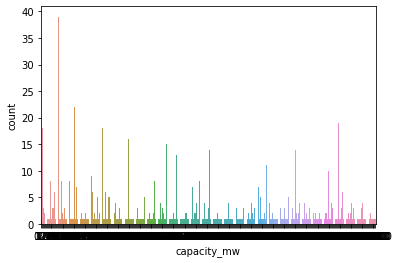

In [157]:
sns.countplot(x='capacity_mw',data=data)

In [158]:
df1=data.select_dtypes([np.int,np.float])

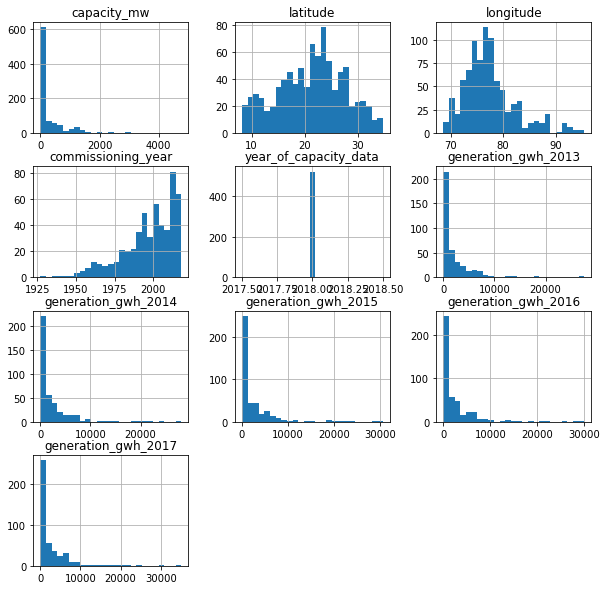

In [159]:
data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()


<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

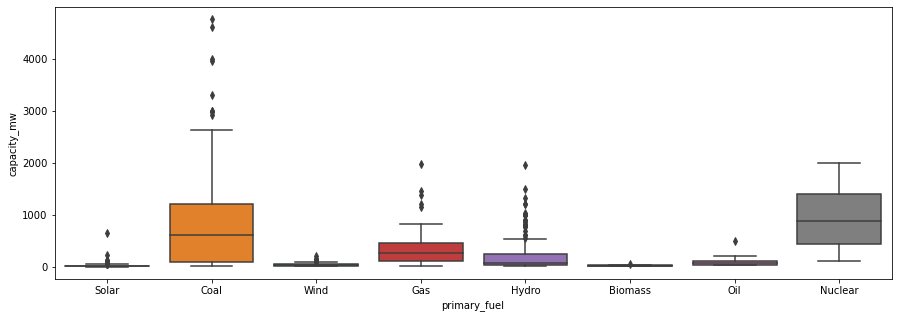

In [160]:
plt.figure(figsize=(15,5))
sns.boxplot(x="primary_fuel", y="capacity_mw",data=data)

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

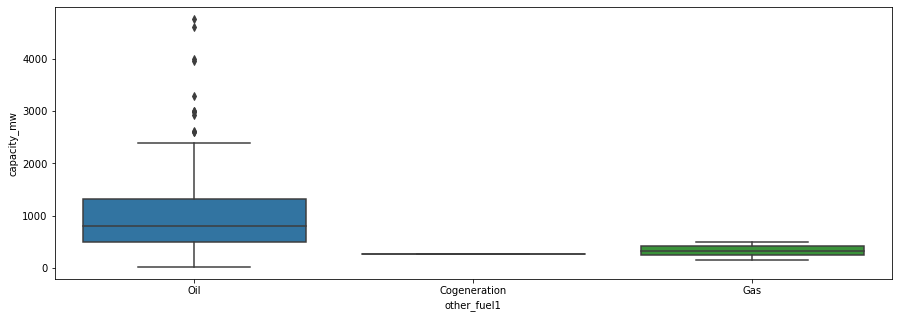

In [161]:
plt.figure(figsize=(15,5))
sns.boxplot(x="other_fuel1", y="capacity_mw",data=data)

# Plotting Heatmap (Correlation Matrix)

<AxesSubplot:>

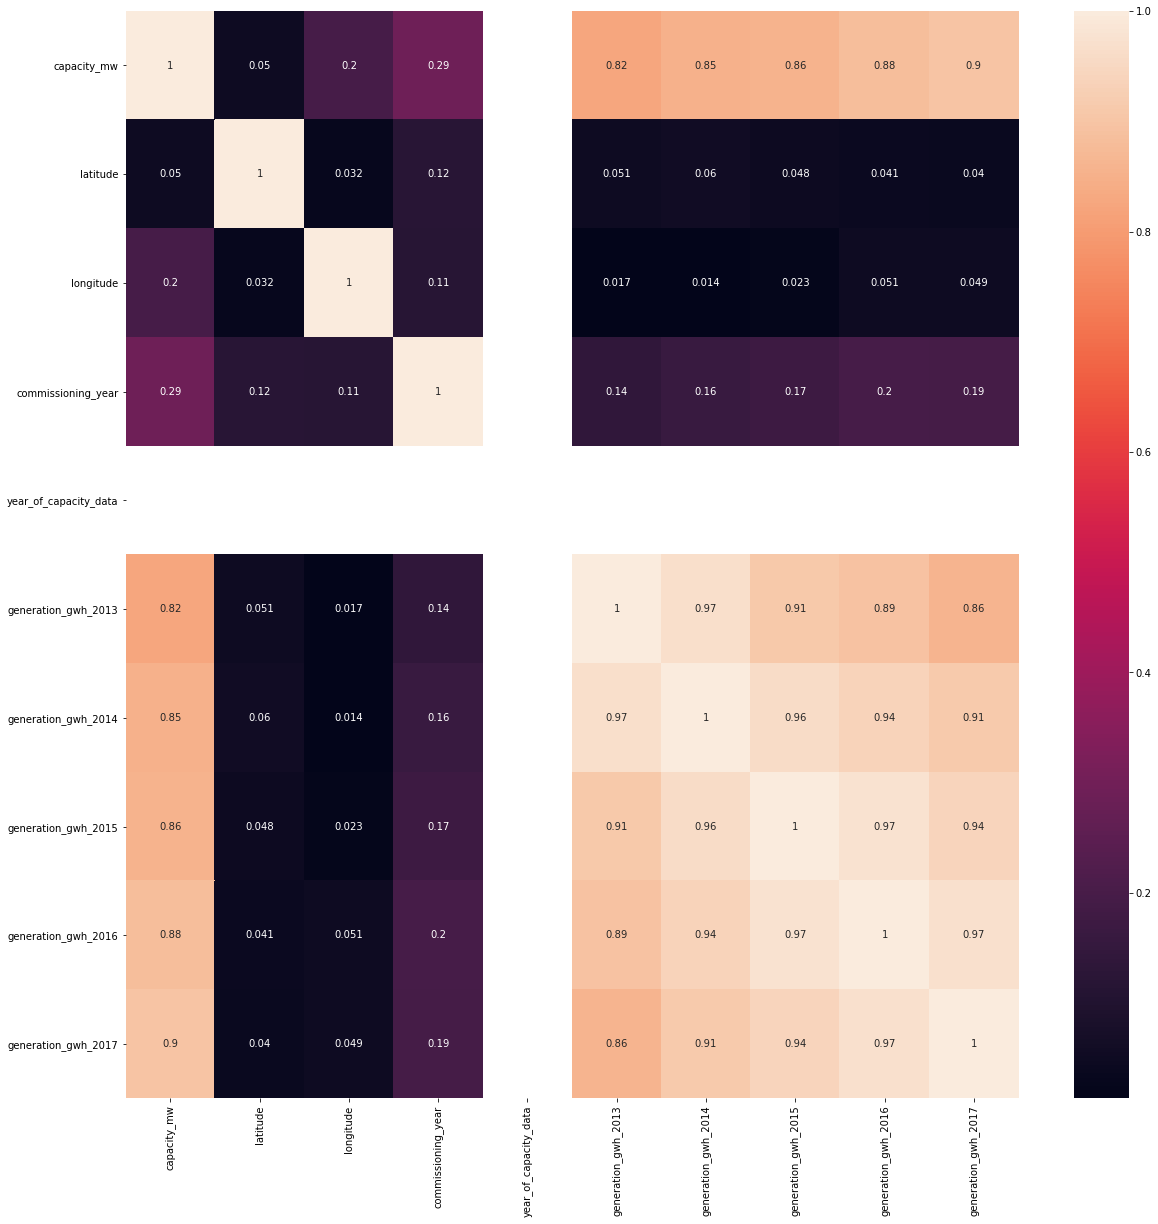

In [162]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),color='k', annot=True)


# Creating Classification

In [163]:
label_quality = LabelEncoder()

In [164]:
data['primary_fuel'] = label_quality.fit_transform(data['primary_fuel'])

In [165]:
data.head(10)

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,NaN,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,NaN,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,NaN,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,NaN,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.7470,886.004428,663.774500,Central Electricity Authority
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,Oil,NaN,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736,Central Electricity Authority
5,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,1,Oil,NaN,2005.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000,Central Electricity Authority
6,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,3,NaN,NaN,1970.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,147.568450,157.558250,152.1952,61.421350,89.629600,Central Electricity Authority
7,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,3,NaN,NaN,2010.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,696.738800,674.391100,721.3352,675.724400,679.594950,Central Electricity Authority
8,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,3,NaN,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,504.813250,480.594950,144.4342,402.029750,439.372100,Central Electricity Authority
9,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,1,Oil,NaN,2008.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,2642.322000,1887.904000,1643.0460,1338.093000,1563.457000,Central Electricity Authority


# SETTING DEPENDENT & INDEPENDENT VARIABLE

In [166]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            908 non-null    object 
 1   name                    908 non-null    object 
 2   gppd_idnr               908 non-null    object 
 3   capacity_mw             908 non-null    float64
 4   latitude                862 non-null    float64
 5   longitude               862 non-null    float64
 6   primary_fuel            908 non-null    int32  
 7   other_fuel1             199 non-null    object 
 8   other_fuel2             1 non-null      object 
 9   commissioning_year      528 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  908 non-null    object 
 12  url                     908 non-null    object 
 13  geolocation_source      889 non-null    object 
 14  year_of_capacity_data   520 non-null    fl

In [168]:
data.drop(['country_long','name','gppd_idnr','other_fuel1','other_fuel2','owner','source','url','geolocation_source','generation_data_source'],axis=1,inplace=True)

In [169]:
y=data.primary_fuel
x=data.drop('primary_fuel',axis=1)


In [170]:
X=data.iloc[:,1:14]
y=data['capacity_mw']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [172]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [179]:
def models(x_train,y_train):
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train) 
    
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5 , metric='minkowski',p=2)
    knn.fit(x_train,y_train) 
    
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)
    
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)

    
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)

   
    from sklearn.ensemble import RandomForestClassifier    
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    
print('[0]Logistic Regression Training Accuracy:',log.score(x_train,y_train))
print('[1]Nearest Neighbor Training Accuracy:',knn.score(x_train,y_train))
print('[2]Support Vector Machin Linear Classifier Training Accuracy:',svc_lin.score(x_train,y_train))
print('[3]Support Vector RBF Classifier Training Accuracy:',svc_rbf.score(x_train,y_train))
print('[4]Gussain Naive Bayes Training Accuracy:',gauss.score(x_train,y_train))
print('[5]DEcision Tree Classifier Training Accuracy:',tree.score(x_train,y_train))
print('[6]Random Forest Classifier Training Accuracy:',forest.score(x_train,y_train))

return log, knn, svc_lin, svc_rbf, gauss, tree,forest

    

NameError: name 'log' is not defined

NameError: name 'knn' is not defined